# 1-D Particle in a Box

## Intro

Let's use an example of a free particle inside a well with sides of infinite potential so that the particle is confined to the well. This problem is called the 1-D particle in a box.

![image.png](images/F3.1.jpg)

Given, $\hat{H}\psi(x)=E\psi(x)$, and $\hat{H}=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x)$ we get the following result for the particle in a 1-D box:

$$ \frac{d^2\psi}{dx^2} + \frac{2mE}{\hbar^2}\psi(x) = 0; \space \space 0\leq x \leq a$$

where the particle's position is confined inside the bounds of the box.

The probability of finding a particle in a particular location is given by the probability density, or $\left|\psi(x)\right|^2$, which is evaluated as $\psi^*(x)\psi(x)$, where $\psi^*(x)$ is the complex conjugate of the wavefunction.

## Solutions for Particle in a Box

A general solution, or *ansatz*, to this problem is $\psi(x) = A\space cos\space kx + B\space sin\space kx$, where $k=\frac{\sqrt{2mE}}{\hbar}=\frac{2\pi\sqrt{2mE}}{h}$.

Now, that we have this general expression, we must apply our boundary conditions ($\psi(0)=\psi(a)=0$) to get our specific wavefunction. Using our first boundary condition, $\psi(0)=0$, we see that both $A\space cos\space kx$ and $B\space sin\space kx$ must be $0$, when $x=0$, so $A=0$, because $cos(0)=1$.

Now the second boundary condition gives $\psi(a) = B\space sin \space ka = 0$, so $ka = n\pi$ to satisfy the periodic nature of the sine function.

Using our expression for k given previously, we get:
$$E_n = \frac{h^2n^2}{8ma^2}$$

This gives us energy levels that are discrete values (read: energy is quantized!), dependent on the length of the box, mass of the particle, and n, a *quantum* number.

Finally, the wavefunction for a particle in a box is

$$\psi_n(x)=B \space sin\space\frac{n\pi x}{a}; \space n = 1, 2, 3...$$

### Exercise (by hand)

Let's calculate the energy levels for n=1..4 for a particle in a box. (Assume $m=m_e$ and $a=1\text{\AA}$)



### Exercise (python)

Now let's calculate up to n=100 and plot them. You have a template that plots the energy levels using horizontal lines in eV. Extend the loop to 100 (remember what is inclusive or exclusive), write a function, and plot the energy levels using with black lines.





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import scienceplots
plt.style.use('science')

In [2]:
def piab_e(n, a, m):
    #enter your code here
    return

In [3]:
# Change this code
"""
energy_levels = []
J2eV = const.physical_constants["joule-electron volt relationship"][0]
for n in np.arange(0, 4):
    energy_levels.append(piab_e(n, 1e-10, const.m_e)*J2eV)
fig, ax = plt.subplots(figsize=(1, 10))
ax.set_ylabel("Energy / eV")
for i in energy_levels:
    ax.hlines(i, 0, 1)
ax.set_xticks([])
"""

'\nenergy_levels = []\nJ2eV = const.physical_constants["joule-electron volt relationship"][0]\nfor n in np.arange(0, 4):\n    energy_levels.append(piab_e(n, 1e-10, const.m_e)*J2eV)\nfig, ax = plt.subplots(figsize=(1, 10))\nax.set_ylabel("Energy / eV")\nfor i in energy_levels:\n    ax.hlines(i, 0, 1)\nax.set_xticks([])\n'

## Normalization

The probility that a particle in a box must be 1, i.e. it must be in the box. Mathematically we write this as follows:

$$\int_0^a\psi_n^*(x)\psi_n(x)dx=1$$

Substituting our wavefunction for particle in a box into the above expression, we get

$$\left|B\right|^2\int_0^a sin^2\frac{n\pi x}{a}dx = 1$$

### Exercise 

Solve for B!


In [4]:
from sympy import *
x, a, B = symbols('x a B', positive=True)
# have to tell sympy that n is an integer IOT simplify the sine expression
n = symbols('n', integer=True, positive=True)
expr = integrate((B*sin(n*pi*x/a))**2, (x, 0, a))
solve(expr-1, B)[0]

sqrt(2)/sqrt(a)

### Exercise

a.) Calculate the proabability that a particle will be found between 0 and a/2.

b.) Calculate the probabilit that a particle will be found between a/4 and 3a/4.

c.) Would these probabilities be difference classically?

In [5]:
expr1 = integrate((sqrt(2/a)*sin(n*pi*x/a))**2, (x, a/4, 3*a/4))
expr2 = integrate((sqrt(2/a)*sin(n*pi*x/a))**2, (x, 0, a/2))

Now let's take our two expressions and simplify them algebraicly.

In [6]:
expr1.simplify()

(pi*n + sin(pi*n/2) - sin(3*pi*n/2))/(2*pi*n)

In [7]:
expr2.simplify()

1/2

Let's evaluate them for a $1\text{\AA}$ box with $n=1$.

In [8]:
expr1.evalf(subs={a:1e-10, n:1}), expr2.evalf(subs={a:1e-10, n:1})

(0.818309886183791, 0.500000000000000)

So the particle is most likely in the middle of the box. Let's plot that.

Text(0, 0.5, '$\\left|\\psi(x)\\right|^2$')

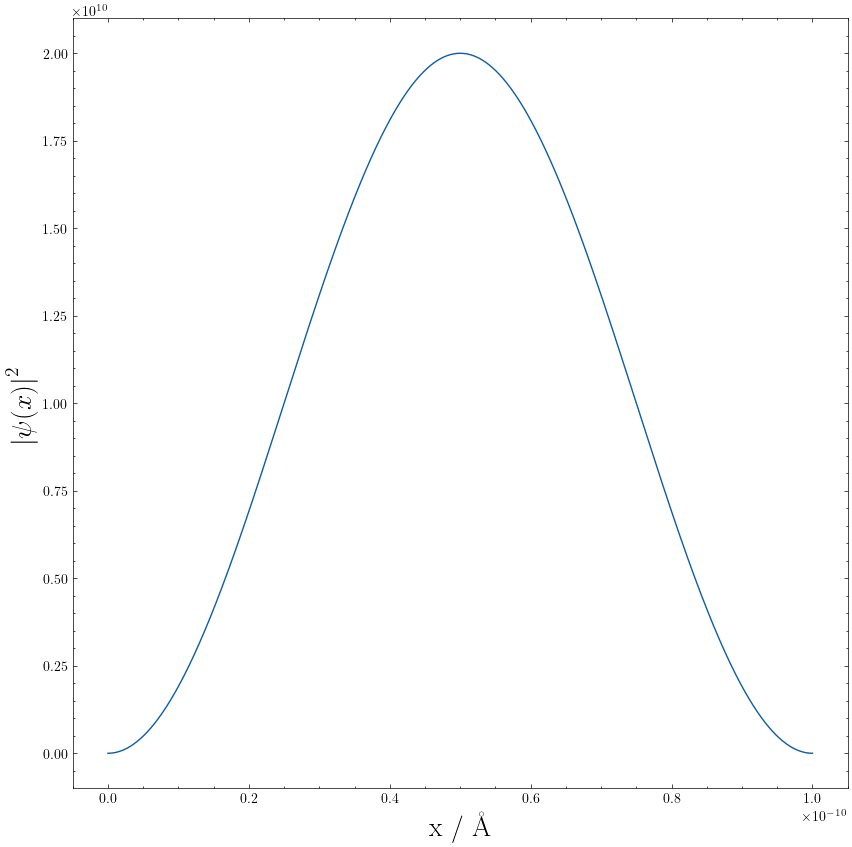

In [9]:
def piab_wavefunction(n, a, x):
    return sqrt(2/a)*sin(n*pi*x/a)

wavefunction = []
for x in np.linspace(0, 1e-10, 1000):
    wavefunction.append(piab_wavefunction(1, 1e-10, x)**2)
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(np.linspace(0, 1e-10, 1000), wavefunction)
ax.set_xlabel(r'x / $\text{\AA}$', fontdict={'fontsize': 20})
ax.set_ylabel(r'$\left|\psi(x)\right|^2$', fontdict={'fontsize': 20})

Now let's do it for a much higher value of n. Approaching the classical limit.

In [10]:
expr1.evalf(subs={a:1e-10, n:20}), expr2.evalf(subs={a:1e-10, n:20})

(0.500000000000000, 0.500000000000000)

We see that both integrals are now equal to $50\%$, which is what is expected classically.

### Exercise

Plot the wavefunction for n=100.

Text(0, 0.5, '$\\left|\\psi(x)\\right|^2$')

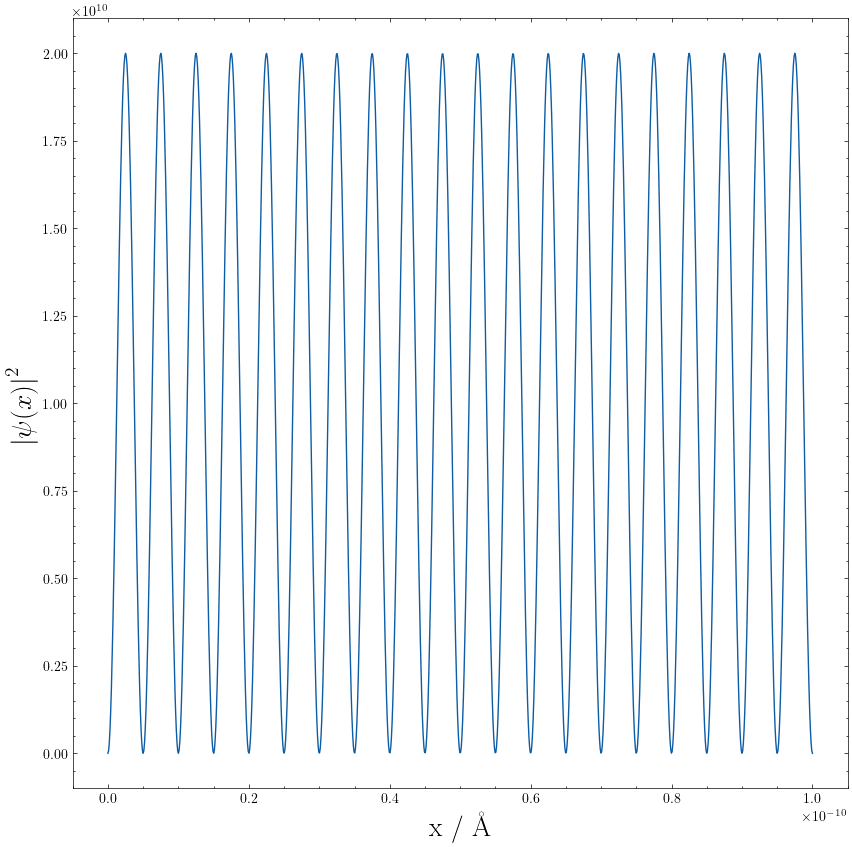

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
wavefunction = []
for x in np.linspace(0, 1e-10, 1000):
    wavefunction.append(piab_wavefunction(20, 1e-10, x)**2)
ax.plot(np.linspace(0, 1e-10, 1000), wavefunction)
ax.set_xlabel(r'x / $\text{\AA}$', fontdict={'fontsize': 20})
ax.set_ylabel(r'$\left|\psi(x)\right|^2$', fontdict={'fontsize': 20})

## Orthogonality

Now, let's define another important aspect of wavefunctions; namely, orthonormality:

$$ \int_{-a}^a\psi_m^*(x)\psi_n(x)dx = \delta_{mn}$$

where $\delta_{mn}$ is the Kroenecker Delta defined as:

$$\delta_{mn}=1; \space if\space m\neq n$$
$$\delta_{mn}=0; \space if\space m=n$$

Let's give a concrete example using the particle in a box wavefunctions. Using Sympy, we can actually check both options at once.

In [22]:
x, a = symbols('x a', positive=True)
n, m = symbols('n m', integer=True, positive=True)
expr = integrate(sqrt(2/a)*sin(n*pi*x/a)*sqrt(2/a)*sin(m*pi*x/a), (x, 0, a))
expr

Piecewise((0, Ne(m, n)), (1, True))

Excellent! We have verified that our wavefunctions are both normalized and orthogonal!

## Observables

To obtain the expectation value of an observable, a physical quantity, can be calculated using the operator for that observable as follows, using position as the physical quantity of interest.

$$ \langle x \rangle = \int^a_0\psi^*(x)\hat{x}\psi(x)dx$$

For a particle in a box we get the expression:

$$ \langle x \rangle = \frac{2}{a} \int^a_0 x\space sin^2\frac{n\pi x}{a}dx$$
which reduces to:
$$\langle x \rangle = \frac{2}{a} \cdot \frac{a^2}{4}= \frac{a}{2}$$

Therefore our average position is the middle of the box, which is what is expected. Now, we need to calculate the variance around those values $\sigma_x^2$, which is given by the expression:

$$\sigma_x^2 = \langle x^2 \rangle - \langle x \rangle^2$$

We have already calculated $\langle x \rangle$, so now we must calculate $\langle x^2 \rangle$, which we do in a similar manner as before.

$$\langle x^2 \rangle = \frac{2}{a}\int^a_0 x^2 \space sin^2 \frac{n \pi x}{a} dx$$

$$ = {(\frac{a}{2 \pi n})}^2 (\frac{4 \pi^2 n^2}{3} - 2) = \frac{a^2}{3} - \frac{a^2}{2n^2 \pi^2}$$

Now let's square our previous result and plug it into our expression for the variance.

$$\sigma_x^2 = \langle x^2 \rangle - \langle x \rangle^2 = \frac{a^2}{12} - \frac{a^2}{2 n^2 \pi^2} = {(\frac{a}{2 \pi n})}^2 (\frac{\pi^2 n^2}{3} - 2)$$ 

This gives us the variance. To find our standard deviation we just take the root.

$$\sigma_x = \frac{a}{2 \pi n}{(\frac{\pi^2 n^2}{3}-2)}^{\frac{1}{2}}$$


### Exercise

Let's do this for the momentum operator $\hat{P}_x = -i \hbar \frac{d}{dx}$ and find the average momentum of a particle in a 1-D box.

Python code to determine that is below.

In [13]:
hbar,  a , x = symbols('hbar a x', positive=True)
n = symbols('n', integer=True, positive=True)

In [16]:
expr = sqrt(2/a)*sin(n * pi * x/a)
expr2 = expr * -I * hbar * diff(expr, x)
expr1 = integrate(expr * -I * hbar * diff(expr, x), (x, 0, a))
print(expr2)
expr1.simplify()

-2*I*pi*hbar*n*sin(pi*n*x/a)*cos(pi*n*x/a)/a**2


0

## Uncertainty Principle (with context this time!)

From the uncertainty principle we know that:

$$\sigma_p\sigma_x > \frac{\hbar}{2}$$


We've already calculated $\sigma_x$, so let's calculate $\sigma_p$, by hand and programattically.

We start off similarly by calculating $\langle p^2 \rangle$.

$$\langle p^2 \rangle = \int \psi_n^*(x)\hat{P_x}^2\psi_n(x)dx$$
$$\langle p^2 \rangle = \int^a_0[{(\frac{2}{a})}^\frac{1}{2}sin\frac{n \pi x}{a}](-\hbar^2\frac{d^2}{dx^2})[{(\frac{2}{a})}^\frac{1}{2}sin\frac{n \pi x}{a}]dx$$
$$= \frac{2 n^2 \pi^2 \hbar^2}{a^3} \int_0^a sin\frac{n \pi x}{a}sin\frac{n \pi x}{a}dx$$
$$= \frac{2 n^2 \pi^2 \hbar^2}{a^3}\cdot \frac{a}{2} = \frac{n^2 \pi^2 \hbar^2}{a^2}$$

$$\sigma_p^2 = \langle p^2 \rangle - \langle p \rangle^2$$
$$\sigma_p^2 = \frac{n^2 \pi^2 \hbar^2}{a^2} - 0$$
$$\sigma_p = \frac{n \pi \hbar}{a}$$

$$\sigma_p\sigma_x = \frac{n \pi \hbar}{a} \cdot \frac{a}{2 \pi n}{(\frac{\pi^2 n^2}{3} - 2)^{\frac{1}{2}}}$$
$$\sigma_p\sigma_x = \frac{\hbar}{2}\cdot {(\frac{\pi^2 n^2}{3} - 2)}^{\frac{1}{2}}$$

The expression under the root must be greater than 1; therefore, the entire expression satisfies $\sigma_x\sigma_p>\frac{\hbar}{2}$.
